In [ ]:
#Imports
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d
from sklearn.feature_selection import VarianceThreshold
from google.colab import drive
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

In [ ]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    display(HTML(df.to_html(index=False,justify="center")))
    df2 = reportAccuracyDF(report)
    
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

In [ ]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


In [ ]:
drive.mount("/content/drive")

%matplotlib inline 

#link train_labels
linkLabels = "/content/drive/MyDrive/Colab Notebooks/train_labels_Prep.csv"

#link train_labels
linkValues = "/content/drive/MyDrive/Colab Notebooks/train_values_Prep_ME.csv"

#link train_labelsB
linkLabelsB = "/content/drive/MyDrive/Colab Notebooks/train_labels_Prep_Bal.csv"

#link train_labelsB
linkValuesB = "/content/drive/MyDrive/Colab Notebooks/train_values_Prep_ME_Bal.csv"


#Read num_rows_to_read first rows

X = pd.read_csv(linkValues)
y = pd.read_csv(linkLabels)
y = y.to_numpy().ravel()
XB = pd.read_csv(linkValuesB)
yB = pd.read_csv(linkLabelsB)
yB = yB.to_numpy().ravel()
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=5)

(X_trainB, X_testB,  y_trainB, y_testB) = cv.train_test_split(XB, yB, test_size=.3, random_state=5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
yB

array([1, 1, 1, ..., 3, 3, 3])

#SVM Balancejat

##Linear Kernel

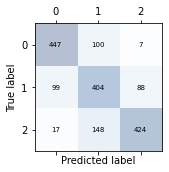


Accuracy on test set:  0.7352941176470589


Class Name,precision,recall,f1-score,support
1,0.79,0.81,0.80,554
2,0.62,0.68,0.65,591
3,0.82,0.72,0.77,589


accuracy,,,0.74,1734
macro avg,0.74,0.74,0.74,1734
weighted avg,0.74,0.74,0.74,1734


In [ ]:
knc = SVC(kernel='linear')
knc.fit(X_trainB, y_trainB)
pred=knc.predict(X_testB)
prettyConfusionMatrix(confusion_matrix(y_testB, pred))
print("\nAccuracy on test set: ",accuracy_score(y_testB, pred))
prettyReport(classification_report(y_testB, pred))

Anotació: 500 files -> 4min 52 segons

## Grid Search

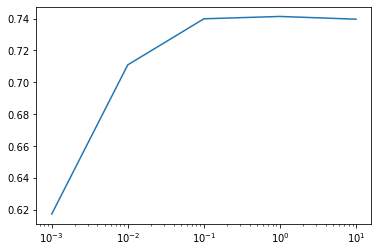

Acc. 4-fold cross on train data=  0.7413452027695351


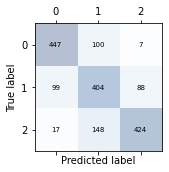


Accuracy on test set:  0.7352941176470589

Best value of parameter C found:  {'C': 1.0}

Number of supports:  2411 ( 2878 of them have slacks)
Prop. of supports:  0.5961918892185954


Class Name,precision,recall,f1-score,support
1,0.79,0.81,0.80,554
2,0.62,0.68,0.65,591
3,0.82,0.72,0.77,589


accuracy,,,0.74,1734
macro avg,0.74,0.74,0.74,1734
weighted avg,0.74,0.74,0.74,1734


None


In [ ]:
Cs = np.logspace(-3, 1, num=5, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=4)
grid_search.fit(X_trainB,y_trainB)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_trainB,  y=y_trainB, cv=4, scoring='accuracy')
print('Acc. 4-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C'])
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_trainB, y_trainB)
pred=knc.predict(X_testB)
prettyConfusionMatrix(confusion_matrix(y_testB, pred))
print("\nAccuracy on test set: ",accuracy_score(y_testB, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_trainB.shape[0])
print(prettyReport(classification_report(y_testB, pred)))


#SVM desbalencejat

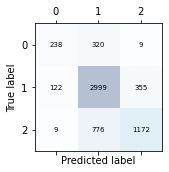


Accuracy on test set:  0.7348333333333333


Class Name,precision,recall,f1-score,support
1,0.64,0.42,0.51,567
2,0.73,0.86,0.79,3476
3,0.76,0.60,0.67,1957


accuracy,,,0.73,6000
macro avg,0.71,0.63,0.66,6000
weighted avg,0.73,0.73,0.73,6000


In [ ]:
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
prettyConfusionMatrix(confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
prettyReport(classification_report(y_test, pred))

Anotació: 500 files -> 4min 52 segons

## Grid Search

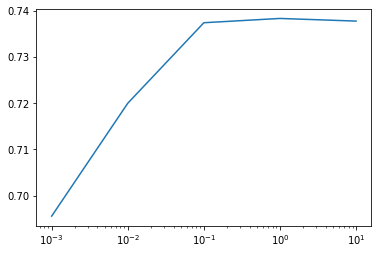

Acc. 4-fold cross on train data=  0.7383571428571428


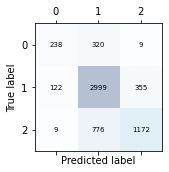


Accuracy on test set:  0.7348333333333333

Best value of parameter C found:  {'C': 1.0}

Number of supports:  8528 ( 9275 of them have slacks)
Prop. of supports:  0.6091428571428571


Class Name,precision,recall,f1-score,support
1,0.64,0.42,0.51,567
2,0.73,0.86,0.79,3476
3,0.76,0.60,0.67,1957


accuracy,,,0.73,6000
macro avg,0.71,0.63,0.66,6000
weighted avg,0.73,0.73,0.73,6000


None


In [ ]:
Cs = np.logspace(-3, 1, num=5, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=4)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('Acc. 4-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C'])
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
prettyConfusionMatrix(confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])
print(prettyReport(classification_report(y_test, pred)))
